In [1]:
!pip install psycopg2

In [4]:
import sys
sys.path.append('..\\sif_research\\data_utils')

import sif_utils as su
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import importlib
import seaborn # optional
seaborn.set() # optional
plt.rcParams['figure.figsize'] = [10, 6] # increase figure size


# Adds the research_framework folder to system path so python knows to look their for imports
sys.path.append('..\\sif_research\\research_framework') # CHANGE FOR MAC OS

import metrics

## Use code from backtest example to load data ##

In [9]:
# Global Variables / Research Environment Settings
start_date = datetime.datetime(day=3, month=1, year=2012)
end_date = datetime.datetime(day=1, month=1, year=2017)
days = (end_date - start_date).days

# Number of stocks to have in the universe
top_N = 100

In [10]:
# Grab all tickers in the universe
tickers = sorted(su.get_universe_tickers(top_N, start_date, end_date))

In [11]:
# Pull data needed for research and store into variables, or however
# you want to handle your data.

# This is the order of the parameters, once you are comfortable feel free
# to not use paramater=foo and just do foo, bar, ...

price_attrs = ['open', 'close', 'low', 'high']
data = su.get_equity_data(tickers=tickers, start_date=start_date, end_date=end_date,
                          attributes=price_attrs)

In [12]:
# Convert from dictionary of dataframes to numpy arrays

OPEN = data['open'].astype(float).values
CLOSE = data['close'].astype(float).values
LOW = data['low'].astype(float).values
HIGH = data['high'].astype(float).values

In [13]:
universe_filter = su.create_universe_filter(top_N, start_date, end_date, tickers, data['close'].index.values)

In [14]:
# Fills all the tickers not in the universe at that point with 0
FILLED_CLOSE = metrics.fill_nonuniverse(universe_filter.values, CLOSE, fill_val=0)

## My strategy going here ##

In [15]:
def strategy(day):
    """
    Attempting to implement basic mean reversion strategy
    :return: numpy array of shape: 1 x len(Universe) with equity holdings
    """
   

In [16]:
# compute holdings
universe_size = len(tickers)
holdings = metrics.backtest(strategy, CLOSE.shape[0], universe_size, lookback)
print(f'Holdings Shape: {holdings.shape}')

NameError: name 'lookback' is not defined

## Starting again with stuff from Hao's notebook ##

In [4]:
import sys
import pandas as pd
import numpy as np
import datetime
sys.path.append('..\\sif_research\\research_framework')
import metrics
import os
from operators import rank, ts_rank, group_rank, weight


sys.path.append('..\\sif_research\\data_utils')

import sif_utils as su

In [5]:
# Global Variables / Research Environment Settings
start_date = datetime.datetime(day=1, month=1, year=2012)
end_date = datetime.datetime(day=1, month=1, year=2017)
days = (end_date - start_date).days
lookback = 20
delay = 1
top_N = 200
initial_investment = 1000
save_backtest_result = True
backtest_result_folder = './backtest_result'
# Get all tickers
tickers = sorted(su.get_universe_tickers(top_N, start_date, end_date))

In [6]:
# Hao's example alpha
def alpha(day):
    # raw factor computed for all tickers (not necesarily the valid universe)
    factor = -rank(CLOSE[day - delay] - CLOSE[day - delay - 4])
    return weight(factor, universe_filter_arr[day])

In [ ]:
def rand_alpha(day):
    

In [7]:
# Grab all tickers in the universe and sort them
tickers = sorted(su.get_universe_tickers(top_N, start_date, end_date))
universe_size = len(tickers)

price_attrs = ['open', 'close', 'low', 'high']
data = su.get_equity_data(tickers=tickers, start_date=start_date,
                          end_date=end_date, attributes=price_attrs)


C:\Users\erueb\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


        return    sharpe   sortino  drawdown  turnover  long count  \
year                                                                 
2012  0.037483  1.185590  1.724285 -0.021467  0.640006  100.134783   
2013  0.026244  1.083916  1.609510 -0.033797  0.624832  100.829365   
2014  0.035461  1.072298  1.548927 -0.028714  0.622047  101.230159   
2015  0.075007  2.084197  3.239515 -0.020712  0.651585   98.952381   
2016  0.065730  1.475085  2.378821 -0.026862  0.620039   98.880478   

      short count  
year               
2012   100.391304  
2013   100.170635  
2014    99.769841  
2015    99.380952  
2016    97.183267  


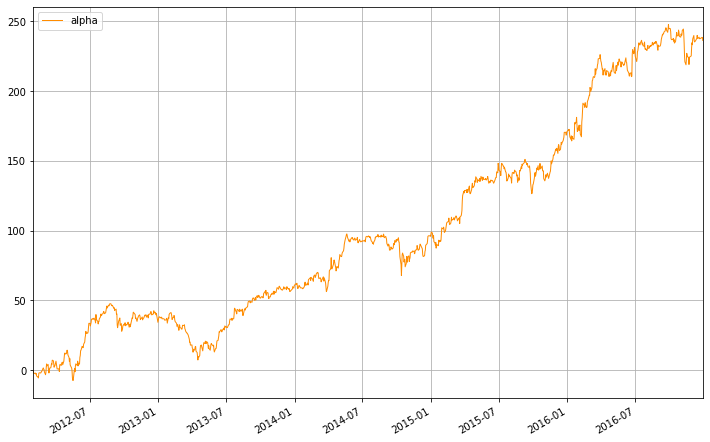

In [9]:
OPEN = data['open'].astype(float).values
CLOSE = data['close'].astype(float).values
LOW = data['low'].astype(float).values
HIGH = data['high'].astype(float).values

# Create universe filter table
all_dates = data['close'].index.values
universe_filter = su.create_universe_filter(top_N, start_date, end_date, tickers, all_dates)

# Grab all tickers in the universe and sort them
tickers = sorted(su.get_universe_tickers(top_N, start_date, end_date))
universe_size = len(tickers)
universe_filter_arr = universe_filter.values


# run backtest, print the performance table and draw the chart
holdings = metrics.backtest(alpha, CLOSE.shape[0], universe_size, lookback)
daily_returns = metrics.daily_return(holdings[:-1], OPEN[lookback:] )
performance = metrics.generate_performance_table(daily_returns, holdings,
                                                 dates=all_dates[lookback:-1],
                                                tickers=tickers)
print(performance)
pnl_df = pd.DataFrame(daily_returns.cumsum() * initial_investment,index = data['close'].iloc[lookback:-1].index, columns = ['alpha'])
chart = pnl_df.plot(grid=True,figsize=[12,8],linewidth=1,color='darkorange')


In [ ]:
# save backtest result
if save_backtest_result == True:
    if not os.path.exists(backtest_result_folder):
        os.makedirs(backtest_result_folder)
    pnl_df.to_csv(backtest_result_folder+'/'+'pnl.csv')
    pd.DataFrame(holdings[:-1],index = data['close'].iloc[lookback:-1].index, columns = tickers).to_csv(backtest_result_folder+'/'+'holdings.csv')
    chart.get_figure().savefig(backtest_result_folder+'/'+'performance.png')
        